In [68]:
import pandas as pd
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from matplotlib.colors import ListedColormap

In [69]:
iris = datasets.load_iris()

In [70]:
iris_data = pd.DataFrame({
    'Sepal length':iris.data[:,0],
    'Sepal width':iris.data[:,1],
    'Petal length':iris.data[:,2],
    'Petal width':iris.data[:,3],
    'class':iris.target
})

In [71]:
print(iris_data)
# iris dataset link: https://github.com/dotnet/machinelearning/blob/main/test/data/iris.txt
# class 0 = Iris-setosa
# class 1 = Iris-versicolor
# calss 2 = Iris-virginica

     Sepal length  Sepal width  Petal length  Petal width  class
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]


In [72]:
# hyperparameter
config = {
    'test_ratio': 0.2,
    'n_folds': 4,
    'n_neighbors': 70
}

In [73]:
def train_test_split(dataset, config):
    train = list(dataset)
    test = list()
    test_size = len(dataset) * config['test_ratio']
    while len(test) < test_size:
        index = randrange(len(train))
        test.append(train.pop(index))
    return train, test

In [74]:
def cross_validation_split(train, config):
    folds = list()
    train_copy = list(train)
    fold_size = len(train) / config['n_folds']
    for _ in range(config['n_folds']):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(train_copy))
            fold.append(train_copy.pop(index))
        folds.append(fold)
    return folds

In [75]:
def k_fold_cross_validation(train, folds, config):
    means = list()
    for k in range(1, config['n_neighbors']+1):
        scores = list()
        for fold in folds:
            new_train = list(folds)
            new_train.remove(fold)
            new_train = sum(new_train, [])    # Flattening a List of Lists
            validation = list(fold)
            predictions = kNN(new_train, validation, k)
            labels = [row[-1] for row in fold]
            accuracy = accuracy_calculation(predictions, labels)
            scores.append(accuracy)
        mean = sum(scores) / float(config['n_folds'])
        means.append((mean, k))               # mean accuracy per k
    best_k = max(means)[1]
    return best_k, means

In [76]:
def accuracy_calculation(predictions, labels):
    count = 0
    for i in range(len(labels)):
        if predictions[i] == labels[i]:
            count += 1
    return count / float(len(labels))

In [77]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1): # -1 for label
        distance += (row1[i] - row2[i]) ** 2
    return distance ** 0.5

In [78]:
def kNN(train, test, k):
    predictions = list()
    for row in test:
        neighbors = get_neighbors(train, row, k)
        prediction = max(set(neighbors), key = neighbors.count)
        predictions.append(prediction)
    return predictions

In [79]:
def get_neighbors(train, test_row, k):
    dists = list()
    for row in train:
        dist = euclidean_distance(row, test_row)
        dists.append((row[-1], dist))  # row[-1] : label
    dists.sort(key = lambda tup: tup[1])
    neighbors = list()
    for i in range(k):
        neighbors.append(dists[i][0])
    return neighbors

In [80]:
# test
def train_test_evaluation(train, test, k):
    predictions = kNN(train, test, k)
    ground_truth = [row[-1] for row in test]
    accuracy = accuracy_calculation(predictions, ground_truth)
    print("Accuracy: %.3f%%" % (accuracy * 100))

# Features Selection 

In [81]:
# choose 2 arguments of Iris
arg1 = input("Please enter 1st argument of Iris: ")
arg2 = input("Please enter 2nd argument of Iris: ")

Please enter 1st argument of Iris: Petal length
Please enter 2nd argument of Iris: Petal width


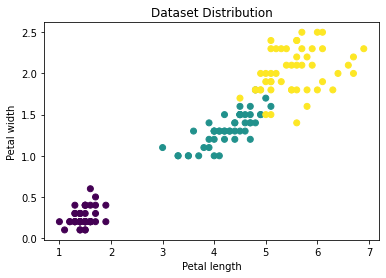

In [82]:
# fig = plt.figure(figsize=(5,5))
plt.xlabel(arg1)
plt.ylabel(arg2)
plt.title("Dataset Distribution")
plt.scatter(iris_data[arg1],iris_data[arg2],c=iris.target)

# Dataset Split

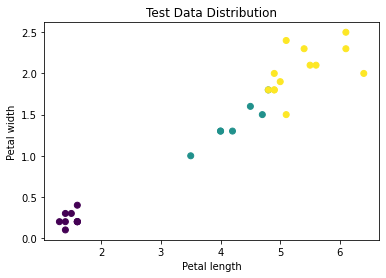

In [83]:
# iris_data[arg1] = (iris_data[arg1] - iris_data[arg1].mean()) / (iris_data[arg1].max() - iris_data[arg1].min())
# iris_data[arg2] = (iris_data[arg2] - iris_data[arg2].mean()) / (iris_data[arg2].max() - iris_data[arg2].min())
dataset = iris_data[[arg1, arg2, 'class']].values.tolist()
train, test = train_test_split(dataset, config)
folds = cross_validation_split(train, config)
# test data distribution plot
t_x = [i[0] for i in test]
t_y = [i[1] for i in test]
t_label = [i[2] for i in test]
plt.title("Test Data Distribution")
plt.xlabel(arg1)
plt.ylabel(arg2)
plt.scatter(t_x,t_y,c=t_label)

## K-Fold Cross Validation

In [84]:
k, means = k_fold_cross_validation(train, folds, config)
acc = [i[0] for i in means]
print("k of highest validation accuracy: %d\nhighest validation accuracy: %.3f %%\n" %(k, max(acc) * 100))
for i in range(len(means)):
    print("k = %2d, accuracy: %.2f %%" %(i+1, acc[i] * 100))

k of highest validation accuracy: 8
highest validation accuracy: 97.500 %

k =  1, accuracy: 97.50 %
k =  2, accuracy: 96.67 %
k =  3, accuracy: 96.67 %
k =  4, accuracy: 96.67 %
k =  5, accuracy: 97.50 %
k =  6, accuracy: 97.50 %
k =  7, accuracy: 96.67 %
k =  8, accuracy: 97.50 %
k =  9, accuracy: 96.67 %
k = 10, accuracy: 96.67 %
k = 11, accuracy: 96.67 %
k = 12, accuracy: 96.67 %
k = 13, accuracy: 96.67 %
k = 14, accuracy: 96.67 %
k = 15, accuracy: 96.67 %
k = 16, accuracy: 96.67 %
k = 17, accuracy: 96.67 %
k = 18, accuracy: 96.67 %
k = 19, accuracy: 96.67 %
k = 20, accuracy: 96.67 %
k = 21, accuracy: 96.67 %
k = 22, accuracy: 96.67 %
k = 23, accuracy: 96.67 %
k = 24, accuracy: 95.83 %
k = 25, accuracy: 96.67 %
k = 26, accuracy: 95.00 %
k = 27, accuracy: 96.67 %
k = 28, accuracy: 95.00 %
k = 29, accuracy: 95.00 %
k = 30, accuracy: 94.17 %
k = 31, accuracy: 95.83 %
k = 32, accuracy: 95.83 %
k = 33, accuracy: 95.83 %
k = 34, accuracy: 95.00 %
k = 35, accuracy: 95.00 %
k = 36, accurac

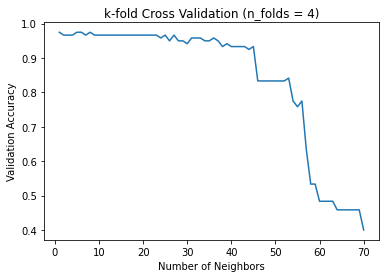

In [85]:
# show which k has highest validation accuracy
plt.plot(range(1,config['n_neighbors']+1), acc, label = 'Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Validation Accuracy')
plt.title("k-fold Cross Validation (n_folds = %d)" % (config['n_folds']))
plt.show()

# Test dataset evaluation

In [86]:
train_test_evaluation(train, test, k)

Accuracy: 93.333%


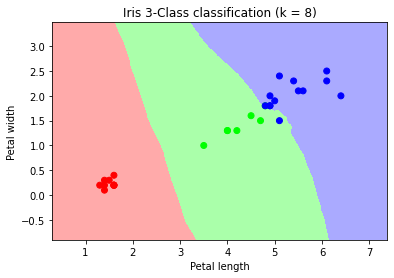

In [87]:
# kNN test data graph with decision boundaries

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .02 # step size in the mesh
test = np.array(test)
y = [row[-1] for row in test]
x_min, x_max = test[:, 0].min() - 1, test[:, 0].max() + 1
y_min, y_max = test[:, 1].min() - 1, test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kNN(train, np.c_[xx.ravel(), yy.ravel()].tolist(), k)
# Put the result into a color plot
Z = np.array(Z)
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(test[:, 0], test[:, 1], c=y, cmap=cmap_bold)
plt.xlabel(arg1)
plt.ylabel(arg2)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris 3-Class classification (k = %d)" % (k))
plt.show()